In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
import keras
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

Using TensorFlow backend.


In [3]:
if keras.backend.backend() != 'tensorflow':
    print("This notebook is for tensorflow backend. There might be problems with other backends")
else:
    print("Using tensorflow backend")
print("Keras version: " + keras.__version__)

Using tensorflow backend
Keras version: 2.0.4


# Load Datasets

In [4]:
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()

In [5]:
train_x = train_x.reshape(train_x.shape[0], 28, 28, 1)
test_x = test_x.reshape(test_x.shape[0], 28, 28, 1)

In [6]:
train_y_onehot = keras.utils.to_categorical(train_y, 10)
test_y_onehot = keras.utils.to_categorical(test_y, 10)

(28, 28, 1)
5


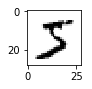

In [7]:
print(train_x[0].shape)
print(train_y[0])
plt.figure(figsize=(1,1))
plt.imshow(train_x[0].reshape(28,28)).set_cmap('Greys')

# Model definition

In [8]:
def model_cnn():
    model = keras.models.Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    return model

### Testing that the initial model works

In [9]:
model = model_cnn()
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(lr=0.001),
              metrics=['accuracy'])

In [10]:
model.predict(np.array([train_x[0]]))

array([[  6.70098332e-09,   1.24739330e-13,   2.61552313e-09,
          2.57598276e-05,   3.18329912e-22,   7.29945015e-20,
          1.33568798e-27,   7.44479512e-24,   9.99974251e-01,
          1.43082771e-14]], dtype=float32)

### Accuracy testing

We should have now model with random accuracy

In [11]:
loss, accuracy = model.evaluate(test_x, test_y_onehot, verbose=1)
accuracy

 9888/10000 [============================>.] - ETA: 0s

0.1008

In [12]:
%%timeit -r 3
print(model.evaluate(test_x, test_y_onehot, verbose=0))

[11.491457809448242, 0.1008]
[11.491457809448242, 0.1008]
[11.491457809448242, 0.1008]
[11.491457809448242, 0.1008]
1.85 s ± 85 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)


### Training the model

In [13]:
history = model.fit(train_x, train_y_onehot,
                      batch_size=32, epochs=6, verbose=1,
                      validation_data=(test_x, test_y_onehot))
print("End accuracy: " + str(history.history['acc'][-1]))

Train on 60000 samples, validate on 10000 samples
Epoch 1/6
60000/60000 [==============================] - 20s - loss: 1.8197 - acc: 0.8383 - val_loss: 0.0721 - val_acc: 0.9774
Epoch 2/6
60000/60000 [==============================] - 19s - loss: 0.1355 - acc: 0.9609 - val_loss: 0.0638 - val_acc: 0.9822
Epoch 3/6
60000/60000 [==============================] - 9s - loss: 0.1087 - acc: 0.9685 - val_loss: 0.0544 - val_acc: 0.9833
Epoch 4/6
60000/60000 [==============================] - 9s - loss: 0.0959 - acc: 0.9731 - val_loss: 0.0508 - val_acc: 0.9867
Epoch 5/6
60000/60000 [==============================] - 9s - loss: 0.0879 - acc: 0.9742 - val_loss: 0.0392 - val_acc: 0.9881
Epoch 6/6
60000/60000 [==============================] - 9s - loss: 0.0767 - acc: 0.9777 - val_loss: 0.0459 - val_acc: 0.9876
End accuracy: 0.97765


# Save & Load & Predict

### Saving

In [14]:
model_dir = './data/keras_model'
import os
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

In [15]:
saved_model_path = model_dir + '/full_model_' + str(len(history.epoch)) + ".h5"
saved_model_path

'./data/keras_model/full_model_6.h5'

In [16]:
model.save_weights(saved_model_path)

### Loading

In [17]:
loaded_model = model_cnn()
loaded_model.load_weights(saved_model_path)

### Predicting

3 : 1.0, (correct : True)


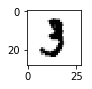

In [21]:
test_img_idx = int(np.random.random()*100)
result = loaded_model.predict(np.array([train_x[test_img_idx]]))

result_class = np.argmax(result)
result_correct = result_class == train_y[test_img_idx]
print("{} : {}, (correct : {})".format(result_class, result[0][result_class], result_correct))
plt.figure(figsize=(1,1))
plt.imshow(train_x[test_img_idx].reshape(28,28)).set_cmap('Greys')

# Debugging

In [19]:
# Very good overview of the current model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________